# Parameter estimation for linear regression models

Suppose we have observations of butyrate production (denoted as 'y') that we hypothesize to depend linearly on the abundance of a particular species, (for now call it 'x'). We can write this dependence as, 

$$
y = m \; x 
$$
where $m$ is an unknown *parameter* that we have to find. 

If we have $n$ observations of both the species abundance and the resulting butyrate production, then we change the notation to show the prediction of observation $i$ where $i = 1, ..., n$. 

$$
y_i = m \; x_i 
$$
Note that there's no index on $m$, since we only have one value of $m$ that we want to find. 

One way to estimate $m$ is to try to find the value that minimizes the squared difference between model predictions, $m x_i$ and measured values, $y_i$. 

$$
m^* = \underset{m}{\text{argmin}} \sum_{i = 1}^n (y_i - m \; x_i)^2 
$$
where the * notation is used to specify that $m^*$ is the optimal value for $m$. 

This problem can be solved *analytically*, which means that we can solve it by hand without requiring the use of a computational solver. 

To find the optimal value for $m$, we can take the derivative of the sum of squares function, often referred to as the *objective function*, *cost function* or *loss function*, set the derivative equal to zero, and solve for $m^*$. 

$$
\frac{ \partial}{\partial m} \sum_{i = 1}^n (y_i - m \; x_i)^2 
$$

$$
=
\sum_{i = 1}^n \frac{ \partial}{\partial m} (y_i - m \; x_i)^2 
$$

$$
=
\sum_{i = 1}^n 2 (y_i - m \; x_i) \frac{ \partial}{\partial m} (y_i - m \; x_i)
$$

$$
=
\sum_{i = 1}^n 2 (y_i - m \; x_i) (-x_i).
$$
Setting the above equal to zero and solving for $m$ gives, 

$$
m^* = \frac{ \sum_{i = 1}^n y_i } { \sum_{i = 1}^n x_i }
$$

This derivation includes a few steps that show up very often in more complicated examples. In the first step, the derivative can be pulled inside of the summation (i.e. the derivative of a sum is equal to the sum of derivatives). In the second step, we used the chain rule of calculus. Finally, by setting the derivative equal to zero and finding the value of $m$ that satisfies the resulting equation, we find the optimal value for $m$.

### We can use numpy in Python to generate "simulated data"

To test the ability of models to fit data, or to test algorithms for fitting models to data, we often start by generating simulated data from a "ground truth" model. Ground truth means that we know what to expect from the data. 

In this case we can use the simulated data to test whether the equation for the optimal parameter $m^*$ is correct. 

In [1]:
# have to import library 
import numpy as np

# number of observations
n_obs = 30

# noise to add to true data
noise = 10 # percent Gaussian noise

# true value for parameter m 
m_true = 2. 

# random set of abundances drawn from uniformly from the interval [0, 1]
x = np.random.uniform(0, 1, n_obs)

# generate noisy observations of function 
y = m_true * x 
y = y + noise/100 * np.random.randn(n_obs)

### Start by visualizing the simulated data

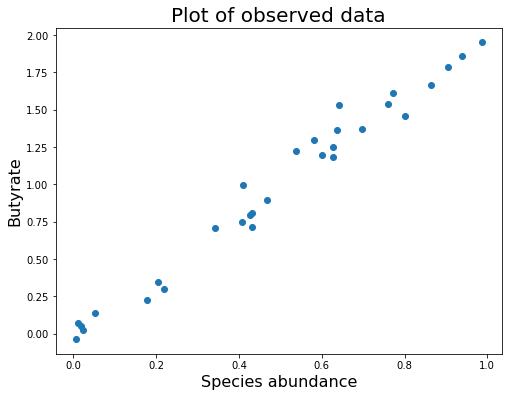

In [2]:
# have to import another library to generate plots 
import matplotlib.pyplot as plt 

# plot butyrate versus species abundance 
plt.figure(figsize=(8, 6))
plt.scatter(x, y)
plt.xlabel("Species abundance", fontsize=16)
plt.ylabel("Butyrate", fontsize=16)
plt.title("Plot of observed data", fontsize=20)
plt.show()

### Estimate the parameter, m

In [3]:
# use the derived equation to estimate the regression coefficient, m
m_pred = np.sum(y) / np.sum(x)
print(r"Estimated m*: {:.3f}".format(m_pred))

Estimated m*: 1.990


### The estimated parameter matches the true value 

The estimated parameter closely matches the true value, which indicates that our derived equation is correct. 

In this way, the simulated data example was useful because it gave us a way to test whether our method for finding the parameters was correct. The same general approach can be used in much more complicated examples where the model has many parameters and we wish to test the ability of a parameter estimation algorithm to recover ground truth parameter values. 

### Test model predictions

Models are useful because we now have a way to make predictions of outcomes in previously unobserved circumstances. In this case our model is 

$$
y = m^* x
$$
so we can make predictions of $y$ for any new value of $x$. 

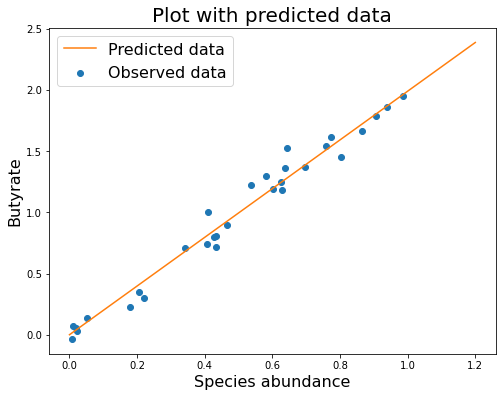

In [4]:
# set x to include values that weren't in the "training" data 
x_new = np.linspace(0, 1.2)
y_new = m_pred*x_new 

# plot butyrate versus species abundance 
plt.figure(figsize=(8, 6))
plt.scatter(x, y, label='Observed data')
plt.plot(x_new, y_new, label='Predicted data', c='C1')

plt.legend(fontsize=16)
plt.xlabel("Species abundance", fontsize=16)
plt.ylabel("Butyrate", fontsize=16)
plt.title("Plot with predicted data", fontsize=20)
plt.show()